In [1]:
## processing
import numpy as np
import pandas as pd

## custom package
import tregseq

## visualization
import matplotlib.pyplot as plt

## Loading and processing sequencing data

In [2]:
fpath = '../data/ykgE_dataset_combined.csv'
df_ykgE = pd.read_csv(fpath)
df_ykgE.head()

,ct,ct_0,ct_1,seq
0,1.0,1.0,0.0,ACAATTTCACCATAAAATGTCGGCGTTGCCGAAAGAAATAAAATGA...
1,1.0,1.0,0.0,ACGAATTCCCCATAAGAAGTAAGCGATGCAGAAAGAAATAAAATTA...
2,1.0,1.0,0.0,ACGAATTCCCCATAAGAAGTAAGCGATGCAGAAAGAAATAAAATTA...
3,2.0,2.0,0.0,ACGACTTGCCCAATAAATGTGAGCGTTGCCAAAAGGAATACAATGA...
4,2.0,2.0,0.0,ACGACTTGCCCAATAAATGTGAGCGTTGCCAAAAGGAATACAATGA...


In [3]:
def trim_seqs(row):
    return row['seq'][:160]

df_ykgE['seq'] = df_ykgE.apply(trim_seqs, axis=1)
df_ykgE = df_ykgE[df_ykgE.ct_0 != 0.0]
df_ykgE['norm_ct_1'] = df_ykgE['ct_1'] / df_ykgE['ct_0']
df_ykgE.head()

,ct,ct_0,ct_1,seq,norm_ct_1
0,1.0,1.0,0.0,ACAATTTCACCATAAAATGTCGGCGTTGCCGAAAGAAATAAAATGA...,0.0
1,1.0,1.0,0.0,ACGAATTCCCCATAAGAAGTAAGCGATGCAGAAAGAAATAAAATTA...,0.0
2,1.0,1.0,0.0,ACGAATTCCCCATAAGAAGTAAGCGATGCAGAAAGAAATAAAATTA...,0.0
3,2.0,2.0,0.0,ACGACTTGCCCAATAAATGTGAGCGTTGCCAAAAGGAATACAATGA...,0.0
4,2.0,2.0,0.0,ACGACTTGCCCAATAAATGTGAGCGTTGCCAAAAGGAATACAATGA...,0.0


## Calculating expression shift

In [4]:
wtseq = 'TCGATTTCCCCATAAAATGTGAGCGATGCCGAAAGAAATAAAATTAGTTATTGCATTTGACGTTTGGATGAAAGATTATCATTTGTCATACAAATGAGGGGTGGTATGTTGCTAGCCAATTAAAAAAGAACGCCATATTTATTGATGATTGATCCCCCGG'

In [5]:
mut_list = df_ykgE['seq'].values
mu_data = df_ykgE['norm_ct_1'].values

In [7]:
windowsize=5
exshift_list = tregseq.footprint.get_expression_shift(mut_list, mu_data, wtseq, smoothed=True, windowsize=windowsize)

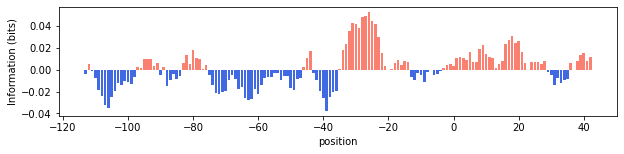

In [8]:
fig, ax = plt.subplots(figsize=(10,2))
ax.set_ylabel('Information (bits)')
ax.set_xlabel('position')

cut = int((windowsize - 1) / 2)
x = np.arange(-115 + cut, 45 - cut)
shiftcolors = [('salmon' if exshift > 0 else 'royalblue') for exshift in exshift_list]
ax.bar(x, exshift_list, edgecolor=None, color=shiftcolors)
plt.show()

## Testing on simulated lacI data

In [9]:
fpath = '../data/synthetic_datasets/lacI_synthetic_dataset.csv'
df_lacI = pd.read_csv(fpath)
df_lacI.head()

,seq,pbound,ct_0,ct_1,ct
0,ACAGGTTTCCCGACTGGAAAGCGGGCAGTGAGCGCAACGCAATTAA...,0.000269,22.0,5.0,27.0
1,ACAGGTTTCCCGACTGGAAAGCGGGCAGTGAGCGCAACGCAATTAA...,0.000088,6.0,0.0,6.0
2,ACAGGTTTCCCGACTGGAAAGCGGGCAGTGAGCGCAACGCAATTAA...,0.000080,8.0,0.0,8.0
3,ACAGGTTTCCCGACTGGAAAGCGGGCAGTGAGCGCAACGCAATTAA...,0.000078,7.0,0.0,7.0
4,ACAGGTTTCCCGACTGGAAAGCGGGCAGTGAGCGCAACGCAATTAA...,0.000045,18.0,0.0,18.0


In [10]:
wtseq = 'ACAGGTTTCCCGACTGGAAAGCGGGCAGTGAGCGCAACGCAATTAATGTGAGTTAGCTCACTCATTAGGCACCCCAGGCTTTACACTTTATGCTTCCGGCTCGTATGTTGTGTGGAATTGTGAGCGGATAACAATTTCACACAGGAAACAGCTATGACCA'

In [11]:
df_lacI = df_lacI[df_lacI.ct_0 != 0.0]
df_lacI['norm_ct_1'] = df_lacI['ct_1'] / df_lacI['ct_0']

n_seqs = len(df_lacI)
mut_list = df_lacI['seq'].values
mu_data = df_lacI['norm_ct_1'].values

In [12]:
windowsize=5
exshift_list = tregseq.footprint.get_expression_shift(mut_list, mu_data, wtseq, smoothed=True, windowsize=windowsize)

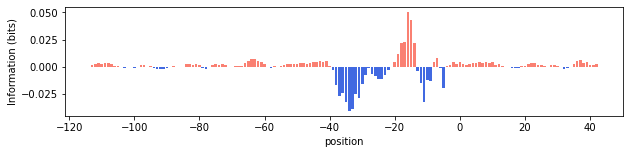

In [13]:
fig, ax = plt.subplots(figsize=(10,2))
ax.set_ylabel('Information (bits)')
ax.set_xlabel('position')

cut = int((windowsize - 1) / 2)
x = np.arange(-115 + cut, 45 - cut)
shiftcolors = [('salmon' if exshift > 0 else 'royalblue') for exshift in exshift_list]
ax.bar(x, exshift_list, edgecolor=None, color=shiftcolors)
plt.show()